4.1. Consider the music genre data set described in Sect. 1.4. The objective
for these data is to use the predictors to classify music samples into the
appropriate music genre.
- (a) What data splitting method(s) would you use for these data? Explain.
- (b) Using tools described in this chapter, provide code for implementing your
approach(es).

References Link:

- http://tunedit.org/challenge/music-retrieval/genres
- http://tunedit.org/download/ISMIS/challenges/music-retrieval/public/genresTrain.csv
- http://tunedit.org/download/ISMIS/challenges/music-retrieval/public/genresTest.csv

In [53]:
library(tidyverse)
library(data.table)
trn <- read_csv("genresTrain.csv")
head(trn)
nrow(trn)/ncol(trn)

-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
√ tibble  1.4.2     √ purrr   0.2.5
√ tidyr   0.8.1     √ dplyr   0.7.5
√ readr   1.1.1     √ stringr 1.3.1
√ tibble  1.4.2     √ forcats 0.3.0
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
x purrr::lift()   masks caret::lift()

Attaching package: 'data.table'

The following objects are masked from 'package:dplyr':

    between, first, last

The following object is masked from 'package:purrr':

    transpose

Parsed with column specification:
cols(
  .default = col_double(),
  GENRE = col_character()
)
See spec(...) for full column specifications.


PAR_TC,PAR_SC,PAR_SC_V,PAR_ASE1,PAR_ASE2,PAR_ASE3,PAR_ASE4,PAR_ASE5,PAR_ASE6,PAR_ASE7,...,PAR_3RMS_TCD,PAR_ZCD_10FR_MEAN,PAR_ZCD_10FR_VAR,PAR_1RMS_TCD_10FR_MEAN,PAR_1RMS_TCD_10FR_VAR,PAR_2RMS_TCD_10FR_MEAN,PAR_2RMS_TCD_10FR_VAR,PAR_3RMS_TCD_10FR_MEAN,PAR_3RMS_TCD_10FR_VAR,GENRE
2.5788,481.45,76989.0,-0.12334,-0.11578,-0.11176,-0.10412,-0.106100,-0.11026,-0.11375,...,0.0020317,0.041056,9.0700e-05,0.049627,0.00023123,0.0112650,2.4068e-05,0.0021769,2.7965e-06,Pop
2.7195,1405.30,825380.0,-0.17655,-0.18323,-0.17773,-0.17057,-0.166440,-0.16174,-0.15371,...,0.0059592,0.082830,1.1221e-03,0.093622,0.00386910,0.0314670,7.7900e-04,0.0067156,4.0732e-05,Blues
2.5351,601.09,686240.0,-0.13940,-0.13251,-0.11486,-0.10173,-0.099342,-0.10936,-0.12668,...,0.0027664,0.043652,3.5815e-04,0.045415,0.00021138,0.0138500,3.7983e-05,0.0030694,1.8371e-06,Pop
2.4465,637.73,122580.0,-0.14995,-0.14802,-0.13800,-0.12927,-0.125150,-0.12340,-0.12159,...,0.0025034,0.045159,3.5586e-04,0.037388,0.00011800,0.0118970,4.4980e-05,0.0026449,5.6050e-06,Jazz
2.5657,776.86,124010.0,-0.16863,-0.16112,-0.15935,-0.15120,-0.140340,-0.13002,-0.12804,...,0.0027029,0.047347,3.0155e-04,0.049469,0.00060605,0.0140520,1.5194e-04,0.0032435,2.9119e-05,Jazz
2.7737,447.09,8531.9,-0.16128,-0.15742,-0.15769,-0.14861,-0.138120,-0.12762,-0.12145,...,0.0019773,0.023864,1.4097e-05,0.021595,0.00022824,0.0075048,7.2913e-05,0.0018830,6.6686e-06,Classical


[1] 65.07812

In [54]:
any(is.na(trn))
# no missing value for this dataset
# na_info <- unlist(lapply(trn,function(x) any(is.na(x))))
# na_info <- names(na_info)[na_info]
# head(na_info)

[1] FALSE

Warning message in barchart.table(table(x), data, ...):
"explicit 'data' specification ignored"

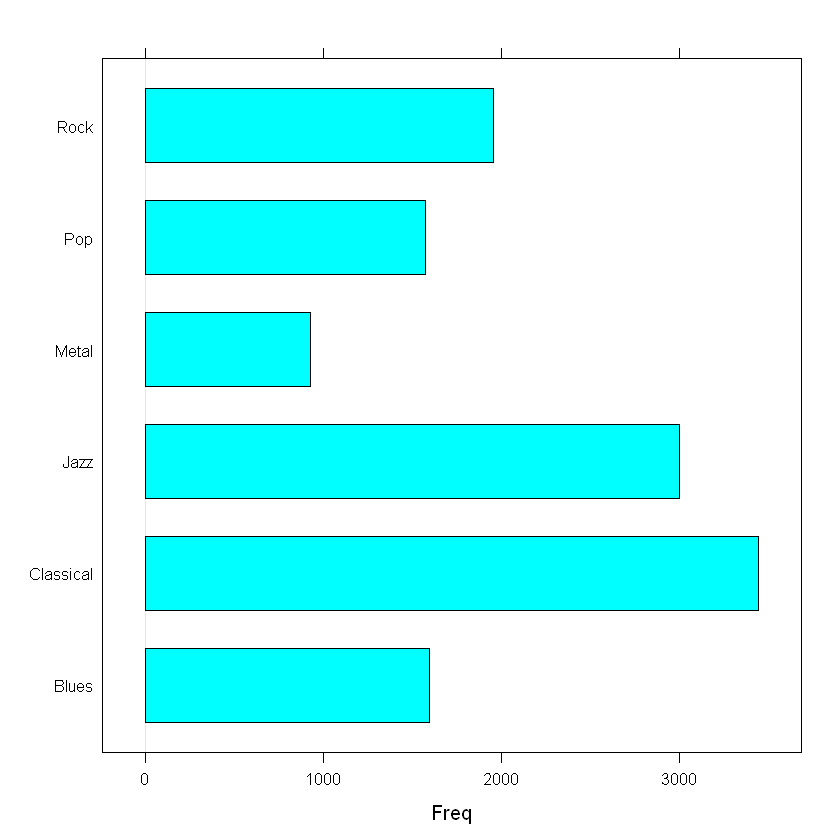

In [55]:
#let's see how genre distribute
library(lattice)
barchart(trn$GENRE,data=trn)
#histogram(~GENRE,data=trn)

In [56]:
library(sampling)
trn$GENRE <- as.factor(trn$GENRE)
trn <- trn[order(trn$GENRE),]
trn_id <- strata(trn,stratanames = c("GENRE"),size=c(1277,2755,2402,739,1260,1562),method = "srswor")

trn_set <- trn[trn_id$ID_unit,]
test_set <- trn[-trn_id$ID_unit,]


Attaching package: 'sampling'

The following object is masked from 'package:caret':

    cluster



Warning message in barchart.table(table(x), data, ...):
"explicit 'data' specification ignored"

Warning message in barchart.table(table(x), data, ...):
"explicit 'data' specification ignored"

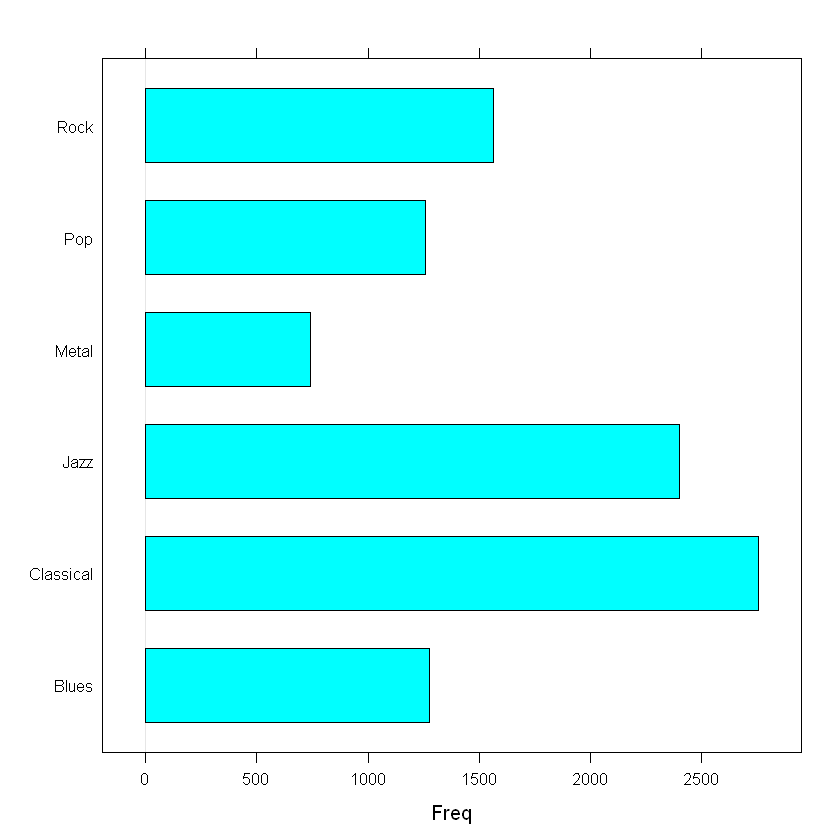

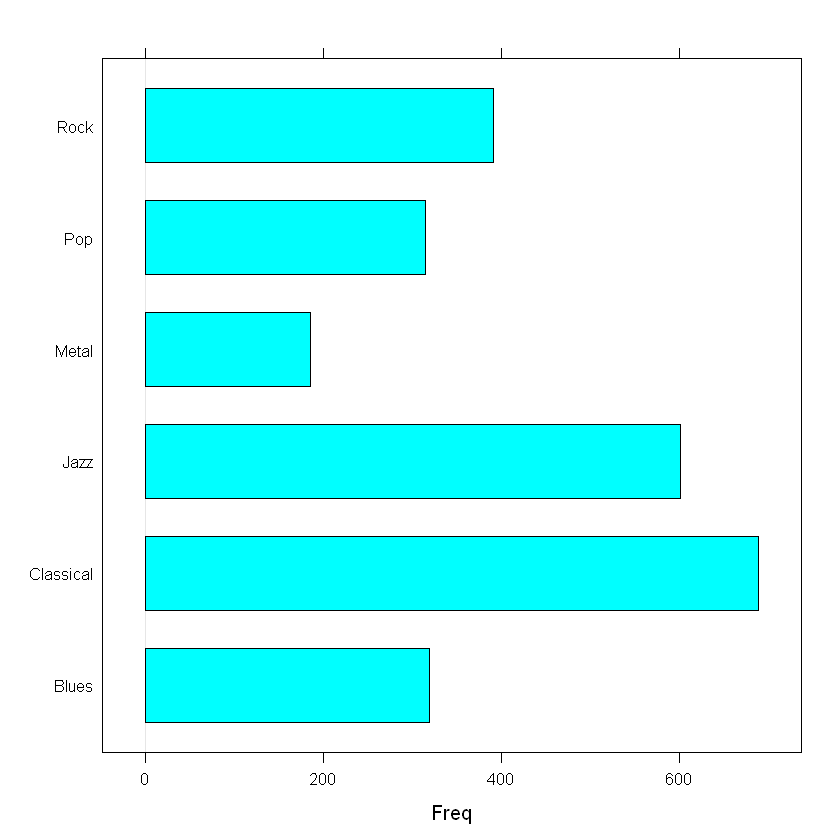

In [57]:
barchart(trn_set$GENRE,data=trn_set)
barchart(test_set$GENRE,data=test_set)

In [58]:
library(caret)
set.seed(31)
tenFoldCV <- createFolds(trn$GENRE, k = 10,returnTrain = T)

In [59]:
str(tenFoldCV$Fold01)

 int [1:11244] 1 2 3 4 5 7 8 9 10 12 ...


In [60]:
fld_1 <- trn[tenFoldCV$Fold01,]

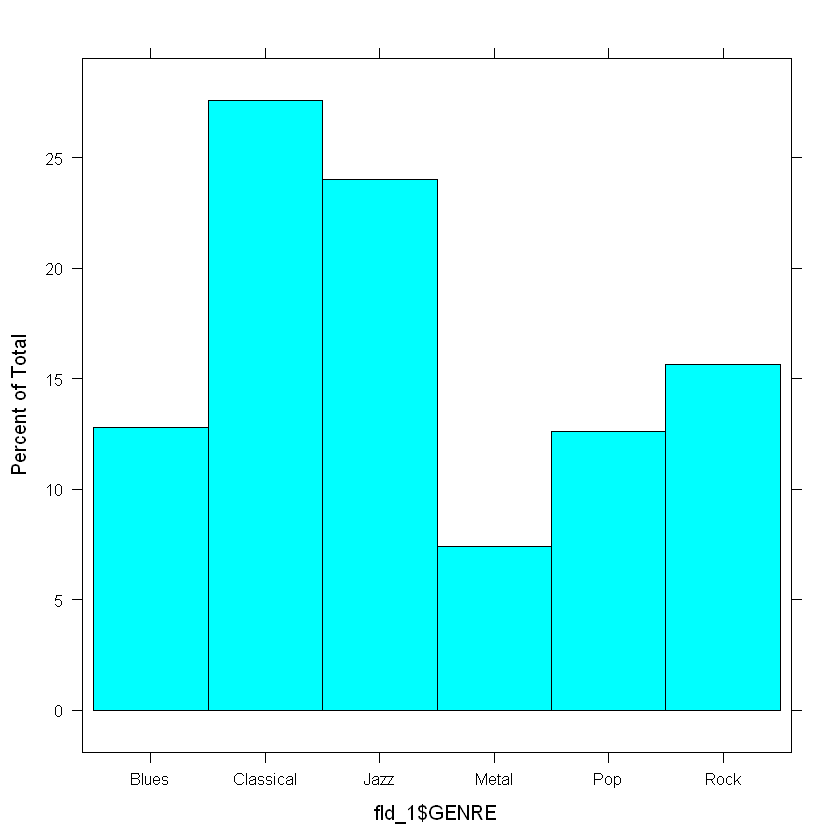

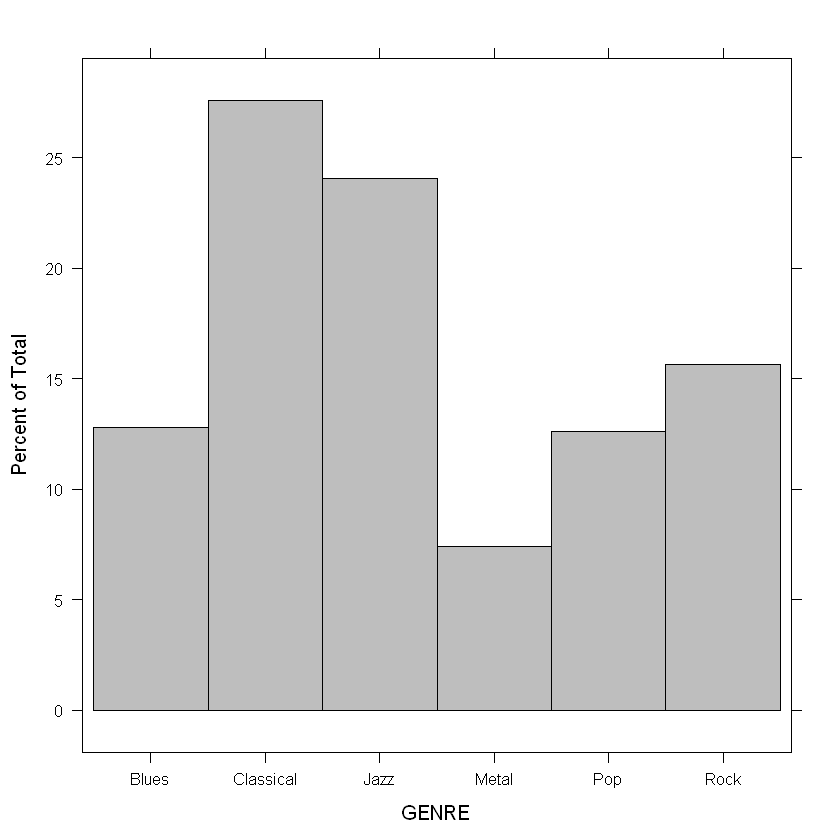

In [61]:
histogram(~fld_1$GENRE,data=fld_1)
histogram(~GENRE,data=trn,col="grey")

4.2. Consider the permeability data set described in Section Sect. 1.4. The objective for this data is to
use the predictors to model compounds’ permeability.

- (a) What data splitting method(s) would you use for this data? Explain.
- (b) Using tools described in this chapter, provide code for implementing your approach(es).

 num [1:165, 1] 12.52 1.12 19.41 1.73 1.68 ...
 - attr(*, "dimnames")=List of 2
  ..$ : chr [1:165] "1" "2" "3" "4" ...
  ..$ : chr "permeability"


[1] 0.1490515

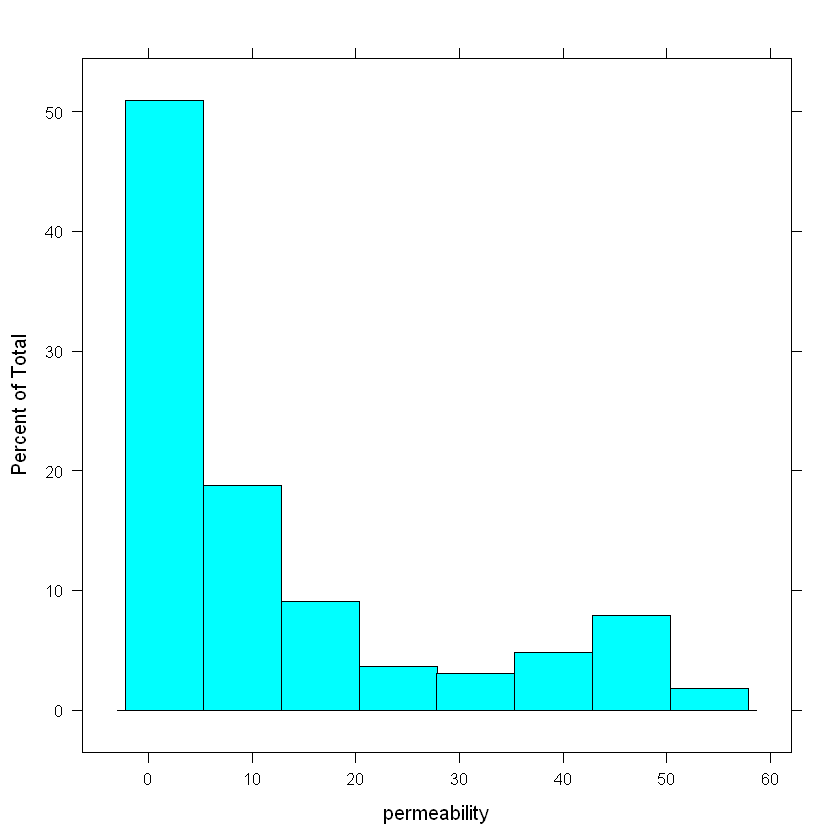

In [62]:
library(AppliedPredictiveModeling)
data(permeability)
str(permeability)
nrow(fingerprints)/ncol(fingerprints)
histogram(~permeability)

In [63]:
set.seed(72)
library(caret)
repeatedCV <- createMultiFolds(permeability,k=10,times = 25)

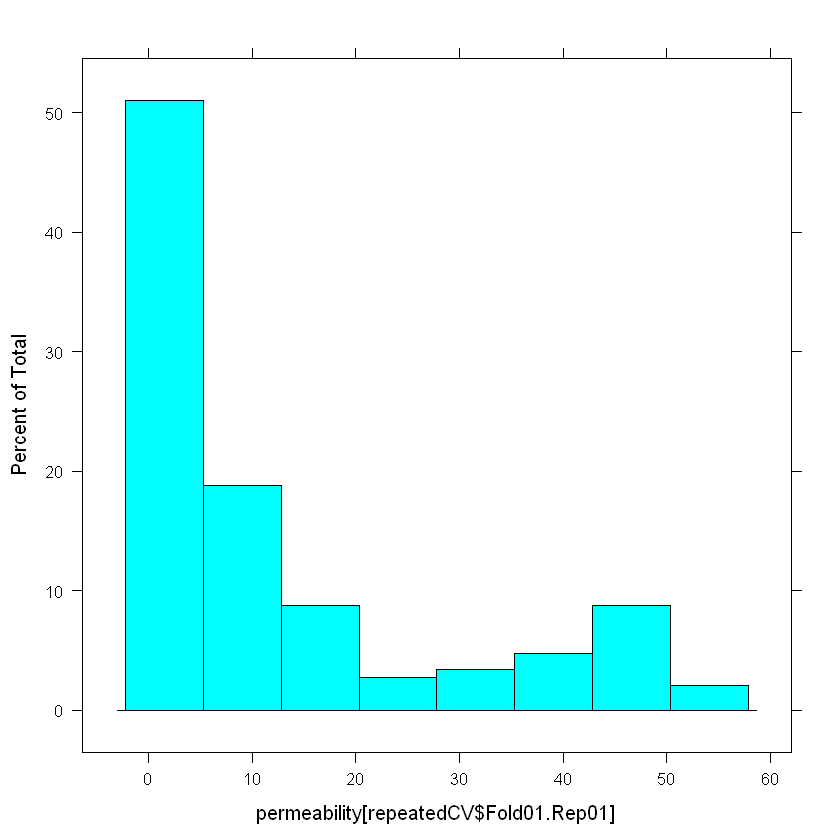

In [64]:
histogram(~permeability[repeatedCV$Fold01.Rep01])

4.3. Partial least squares (Sect. 6.3) was used to model the yield of a chemical
manufacturing process (Sect. 1.4). The data can be found in the AppliedPredictiveModeling package and can be loaded using
```r
library(AppliedPredictiveModeling)
data(ChemicalManufacturingProcess)
```
The objective of this analysis is to find the number of PLS components
that yields the optimal R2 value (Sect. 5.1). PLS models with 1 through 10
components were each evaluated using five repeats of 10-fold cross-validation
and the results are presented in the following table:
- (a) Using the “one-standard error”method, what number of PLS components
provides the most parsimonious model?
- (b) Compute the tolerance values for this example. If a 10 % loss in R2 is
acceptable, then what is the optimal number of PLS components?
- (c) Several other models (discussed in Part II) with varying degrees of complexity were trained and tuned and the results are presented in Fig. 4.13.
If the goal is to select the model that optimizes R2, then which model(s)
would you choose, and why?
- (d) Prediction time, as well as model complexity (Sect. 4.8) are other factors
to consider when selecting the optimal model(s). Given each model’s prediction time, model comp

In [65]:
library(AppliedPredictiveModeling)
data(ChemicalManufacturingProcess)
head(ChemicalManufacturingProcess)

Yield,BiologicalMaterial01,BiologicalMaterial02,BiologicalMaterial03,BiologicalMaterial04,BiologicalMaterial05,BiologicalMaterial06,BiologicalMaterial07,BiologicalMaterial08,BiologicalMaterial09,...,ManufacturingProcess36,ManufacturingProcess37,ManufacturingProcess38,ManufacturingProcess39,ManufacturingProcess40,ManufacturingProcess41,ManufacturingProcess42,ManufacturingProcess43,ManufacturingProcess44,ManufacturingProcess45
38.00,6.25,49.58,56.97,12.74,19.51,43.73,100,16.66,11.44,...,0.019,0.5,3,7.2,NA,NA,11.6,3.0,1.8,2.4
42.44,8.01,60.97,67.48,14.65,19.36,53.14,100,19.04,12.55,...,0.019,2.0,2,7.2,0.1,0.15,11.1,0.9,1.9,2.2
42.03,8.01,60.97,67.48,14.65,19.36,53.14,100,19.04,12.55,...,0.018,0.7,2,7.2,0.0,0.00,12.0,1.0,1.8,2.3
41.42,8.01,60.97,67.48,14.65,19.36,53.14,100,19.04,12.55,...,0.018,1.2,2,7.2,0.0,0.00,10.6,1.1,1.8,2.1
42.49,7.47,63.33,72.25,14.02,17.91,54.66,100,18.22,12.80,...,0.017,0.2,2,7.3,0.0,0.00,11.0,1.1,1.7,2.1
43.57,6.12,58.36,65.31,15.17,21.79,51.23,100,18.30,12.13,...,0.018,0.4,2,7.2,0.0,0.00,11.5,2.2,1.8,2.0


In [66]:
if(any(is.na(ChemicalManufacturingProcess))){
    na_info <- unlist(lapply(ChemicalManufacturingProcess,function(x) any(is.na(x))))
    return (head(names(na_info)[na_info]))
}

[1] "ManufacturingProcess01" "ManufacturingProcess02" "ManufacturingProcess03"
[4] "ManufacturingProcess04" "ManufacturingProcess05" "ManufacturingProcess06"

In [67]:
CMP <- ChemicalManufacturingProcess[,!na_info]

In [68]:
library(caret)
set.seed(19711230)
fit_pls <- train(Yield ~ .,data = CMP,method = "pls",
                 preProc = c("center", "scale"),tuneLength = 10,
                 trControl = trainControl(method = "repeatedcv", repeats = 5))

In [69]:
str(fit_pls)

List of 23
 $ method      : chr "pls"
 $ modelInfo   :List of 14
  ..$ label     : chr "Partial Least Squares"
  ..$ library   : chr "pls"
  ..$ type      : chr [1:2] "Regression" "Classification"
  ..$ parameters:'data.frame':	1 obs. of  3 variables:
  .. ..$ parameter: Factor w/ 1 level "ncomp": 1
  .. ..$ class    : Factor w/ 1 level "numeric": 1
  .. ..$ label    : Factor w/ 1 level "#Components": 1
  ..$ grid      :function (x, y, len = NULL, search = "grid")  
  .. ..- attr(*, "srcref")= 'srcref' int [1:8] 7 26 14 19 26 19 7 14
  .. .. ..- attr(*, "srcfile")=Classes 'srcfilecopy', 'srcfile' <environment: 0x00000000055238d8> 
  ..$ loop      :function (grid)  
  .. ..- attr(*, "srcref")= 'srcref' int [1:8] 15 26 20 19 26 19 15 20
  .. .. ..- attr(*, "srcfile")=Classes 'srcfilecopy', 'srcfile' <environment: 0x00000000055238d8> 
  ..$ fit       :function (x, y, wts, param, lev, last, classProbs, ...)  
  .. ..- attr(*, "srcref")= 'srcref' int [1:8] 21 25 31 19 25 19 21 31
  .. .. ..

In [70]:
R2values <- fit_pls$results[,c("ncomp","Rsquared","RsquaredSD")]
R2values$RsquaredSEM <- R2values$RsquaredSD/sqrt(length(fit_pls$control$index))
R2values

ncomp,Rsquared,RsquaredSD,RsquaredSEM
1,0.3977156,0.1998676,0.02826555
2,0.5081880,0.2189638,0.03096616
3,0.5667223,0.1894780,0.02679623
4,0.5523224,0.2000750,0.02829487
5,0.5376299,0.2190161,0.03097356
6,0.5225713,0.2330304,0.03295547
7,0.5104416,0.2457468,0.03475384
8,0.5089982,0.2472731,0.03496970
9,0.5124249,0.2428281,0.03434107
10,0.5101823,0.2440854,0.03451889


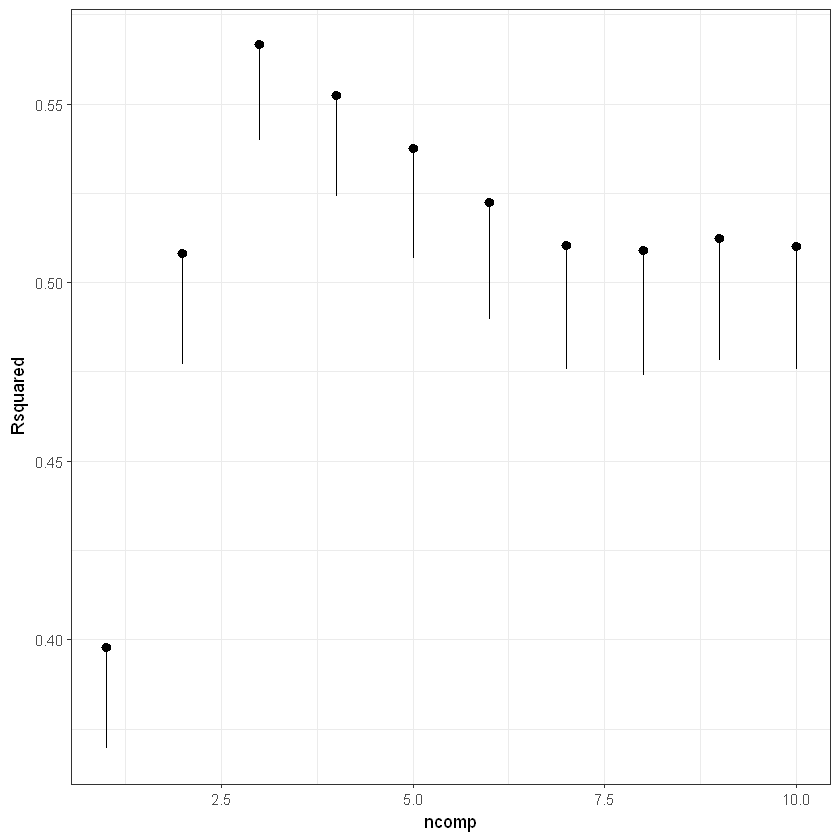

In [71]:
library(ggplot2)
oneSE <- ggplot(R2values,
               aes(ncomp,Rsquared,
                  ymin=Rsquared-RsquaredSEM,
                  ymax=Rsquared)) + geom_linerange() + geom_pointrange() + theme_bw()
oneSE

In [72]:
bestR2 <- subset(R2values,ncomp==which.max(R2values$Rsquared))
bestR2$lb <- bestR2$Rsquared-bestR2$RsquaredSEM
candR2 <- subset(R2values,(Rsquared>=bestR2$lb) & (ncomp <- bestR2$ncomp))

candR2

,ncomp,Rsquared,RsquaredSD,RsquaredSEM
3,3,0.5667223,0.189478,0.02679623
4,4,0.5523224,0.200075,0.02829487


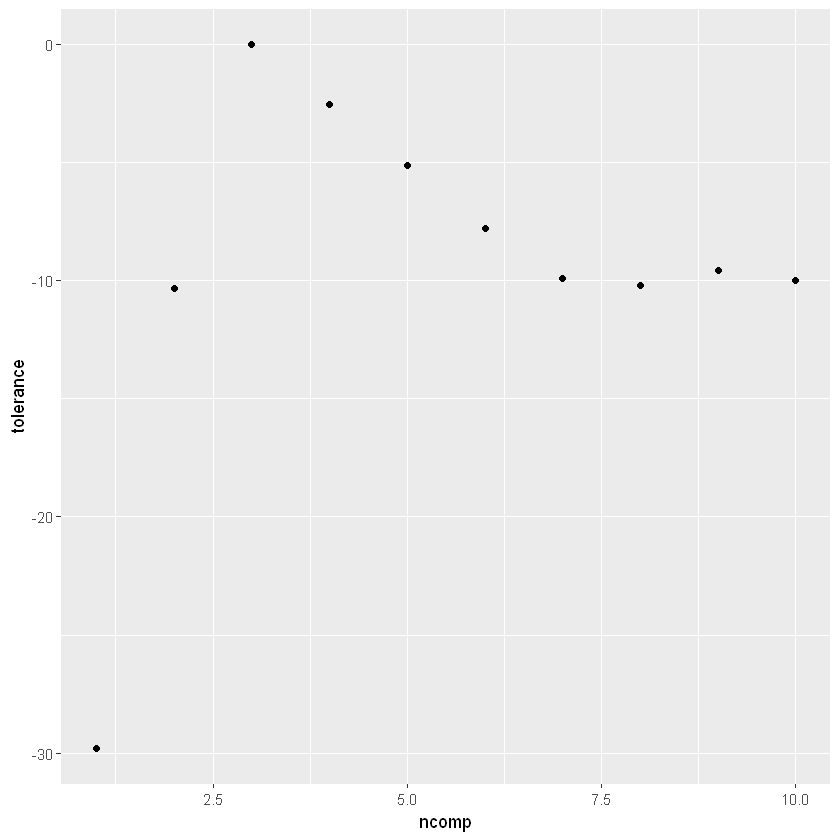

In [73]:
bestR2 <- subset(R2values,ncomp==which.max(R2values$Rsquared))
R2values$tolerance <- (R2values$Rsquared-bestR2$Rsquared)/bestR2$Rsquared * 100
qplot(ncomp,tolerance,data=R2values)

4.4. Brodnjak-Vonina et al. (2005) develop a methodology for food laboratories to determine the type of oil from a sample. In their procedure, they used a gas chromatograph (an instrument that separate chemicals in a sample) to measure seven different fatty acids in an oil. These measurements would then be used to predict the type of oil in a food samples. 
To create their model, they used 96 samples of seven types of oils. These data can be found in the caret package using data(oil). The oil types are contained in a factor variable called oilType. 
The types are pumpkin (coded as A), sunflower (B), peanut (C), olive (D), soybean (E), rapeseed (F) and corn (G). 

- (a) Use the sample function in base R to create a completely random sample of 60 oils. How closely do the frequencies of the random sample match the original samples? Repeat this procedure several times of understand the variation in the sampling process.
- (b) Use the caret package function createDataPartition to create a stratified random sample. How does this compare to the completely random samples?
- (c) With such a small samples size, what are the options for determining performance of the model? Should a test set be used?
- (d) One method for understanding the uncertainty of a test set is to use a confidence interval. To obtain a confidence interval for the overall accuracy, the based R function binom.test can be used. It requires the user to input the number of samples and the number correctly classified to calculate the interval. For example, suppose a test set sample of 20 oil samples was set aside and 76 were used for model training. For this test set size and a model that is about 80 % accurate (16 out of 20 correct), the confidence interval would be computed using

```r
binom.test(16,20)
```
`In this case, the width of the 95 % confidence interval is 37.9 %. Try different samples sizes and accuracy rates to understand the trade-off between the uncertainty in the results, the model performance, and the test set size`

In [74]:
data(oil)
str(oilType)
str(fattyAcids)

 Factor w/ 7 levels "A","B","C","D",..: 1 1 1 1 1 1 1 1 1 1 ...
'data.frame':	96 obs. of  7 variables:
 $ Palmitic  : num  9.7 11.1 11.5 10 12.2 9.8 10.5 10.5 11.5 10 ...
 $ Stearic   : num  5.2 5 5.2 4.8 5 4.2 5 5 5.2 4.8 ...
 $ Oleic     : num  31 32.9 35 30.4 31.1 43 31.8 31.8 35 30.4 ...
 $ Linoleic  : num  52.7 49.8 47.2 53.5 50.5 39.2 51.3 51.3 47.2 53.5 ...
 $ Linolenic : num  0.4 0.3 0.2 0.3 0.3 2.4 0.4 0.4 0.2 0.3 ...
 $ Eicosanoic: num  0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 ...
 $ Eicosenoic: num  0.1 0.1 0.1 0.1 0.1 0.5 0.1 0.1 0.1 0.1 ...


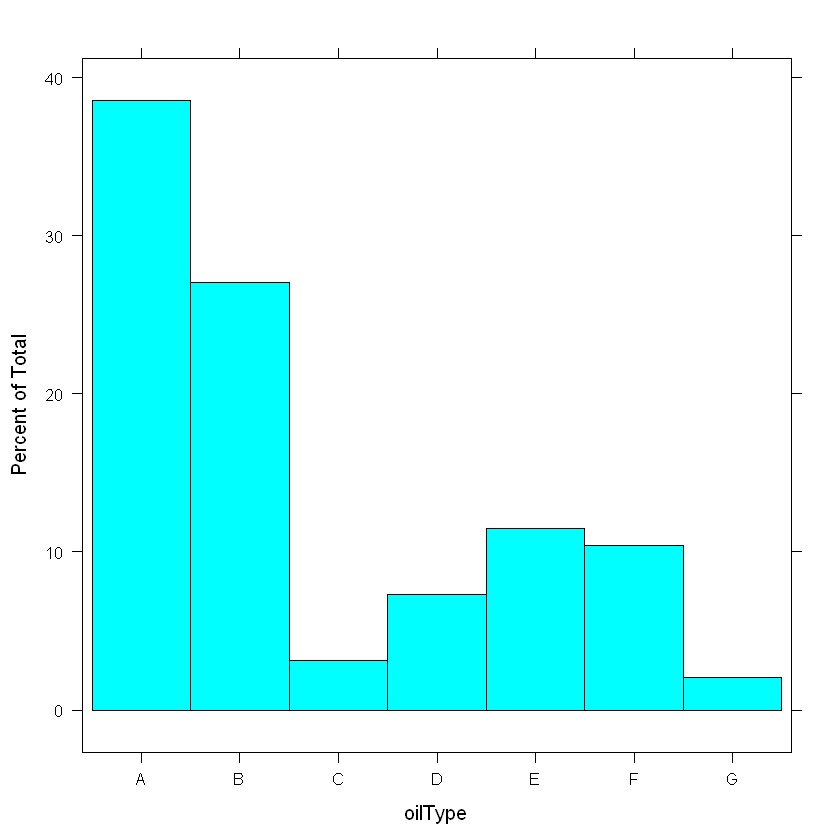

In [75]:
library(lattice)
histogram(~oilType)

In [76]:
if(any(is.na(fattyAcids))){
    na_info <- unlist(lapply(any(is.na(fattyAcids))))
    return (names(na_info[na_info]))
} else print("No missing value for this dataset")

[1] "No missing value for this dataset"


In [77]:
samp_num <- floor(length(oilType)*.6) + 1
set.seed(629)
oil_splits <- vector(mode="list",length=20)
for (i in seq(along=oil_splits)) oil_splits[[i]] <- table(sample(oilType,size=samp_num))
head(oil_splits,3)

[[1]]

 A  B  C  D  E  F  G 
24 15  3  4  7  4  1 

[[2]]

 A  B  C  D  E  F  G 
25 14  2  4  6  6  1 

[[3]]

 A  B  C  D  E  F  G 
24 16  2  5  5  4  2 


In [78]:
oil_splits <- do.call("rbind",oil_splits)
head(oil_splits,3)
summary(oil_splits/samp_num)

A,B,C,D,E,F,G
24,15,3,4,7,4,1
25,14,2,4,6,6,1
24,16,2,5,5,4,2


       A                B                C                 D          
 Min.   :0.3103   Min.   :0.2241   Min.   :0.00000   Min.   :0.03448  
 1st Qu.:0.3448   1st Qu.:0.2586   1st Qu.:0.01724   1st Qu.:0.06897  
 Median :0.3793   Median :0.2759   Median :0.03448   Median :0.08621  
 Mean   :0.3810   Mean   :0.2759   Mean   :0.03362   Mean   :0.08448  
 3rd Qu.:0.4138   3rd Qu.:0.2931   3rd Qu.:0.05172   3rd Qu.:0.10345  
 Max.   :0.4483   Max.   :0.3276   Max.   :0.05172   Max.   :0.12069  
       E                 F                 G          
 Min.   :0.05172   Min.   :0.03448   Min.   :0.00000  
 1st Qu.:0.10345   1st Qu.:0.08621   1st Qu.:0.01724  
 Median :0.10345   Median :0.10345   Median :0.01724  
 Mean   :0.10690   Mean   :0.09828   Mean   :0.01983  
 3rd Qu.:0.12069   3rd Qu.:0.10776   3rd Qu.:0.02155  
 Max.   :0.15517   Max.   :0.13793   Max.   :0.03448  

In [79]:
getWidth <- function(values) {
    binom.test(x = floor(values["size"]*values["accuracy"])+1,
               n = values["size"])$conf.int
}

ciInfo <- expand.grid(size = 10:30, accuracy = seq(.7, .95, by = 0.01))
ciWidths <- t(apply(ciInfo, 1, getWidth))
head(ciWidths)
       
ciInfo$length <- ciWidths[,2] - ciWidths[,1]
# levelplot(length ~ size * accuracy, data = ciInfo)

0.4439045,0.9747893
0.3902574,0.9397823
0.4281415,0.9451394
0.4618685,0.9496189
0.4189647,0.9161107
0.4489968,0.9221285


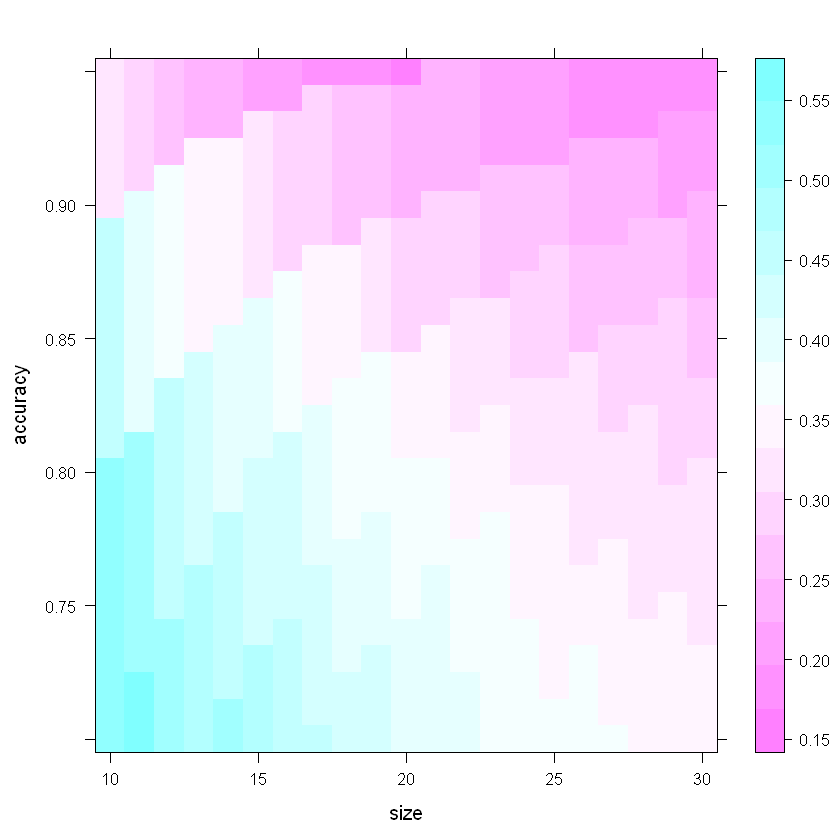

In [80]:
levelplot(length ~ size * accuracy, data = ciInfo)